In [1]:
import pyvista 

In [2]:
from __future__ import annotations

import pyvista as pv
import os
import numpy as np

In [62]:
# folder_path = 'Nurbs_gen'
# folder_path = 'BrepGen'
# folder_path = 'airplane_source'
folder_path = 'other_airplanes'

In [63]:
plotter = pv.Plotter()


/Users/q603750/envs/pyoccenv/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


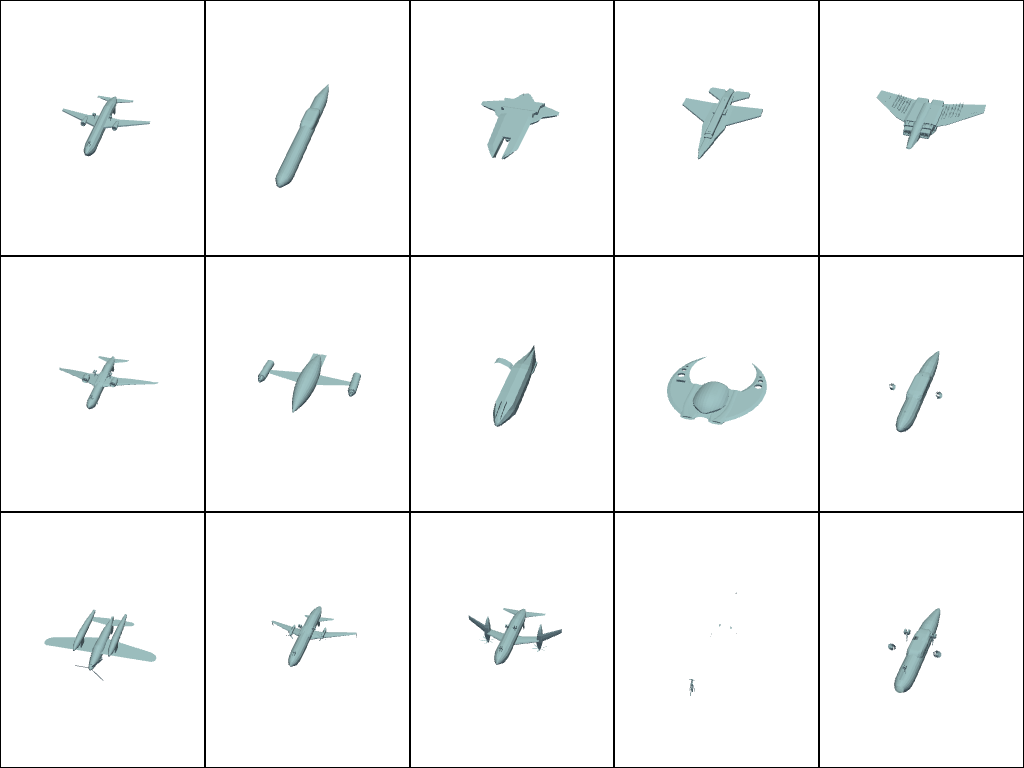

In [80]:
n=3
plotter = pv.Plotter(shape=(n, 5))

light_blue = [0.6, 0.8, 1.0]  

for i, filename in enumerate(os.listdir(folder_path)[:5*n]):
    if filename.endswith('.obj'):
        mesh = pv.read(os.path.join(folder_path, filename))

        plotter.subplot(i %  n, i // n)
        actor = plotter.add_mesh(mesh, cmap="terrain", clim=[2, 5])
        # actor = plotter.add_mesh(mesh, color="lightblue", split_sharp_edges=True, pbr=True, metallic=1.0, roughness=0.3)
        actor.orientation = (-90, 15, 135)

# Display the plot with all meshes in a 2x3 grid
plotter.show()

/Users/q658028/Library/Python/3.12/lib/python/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


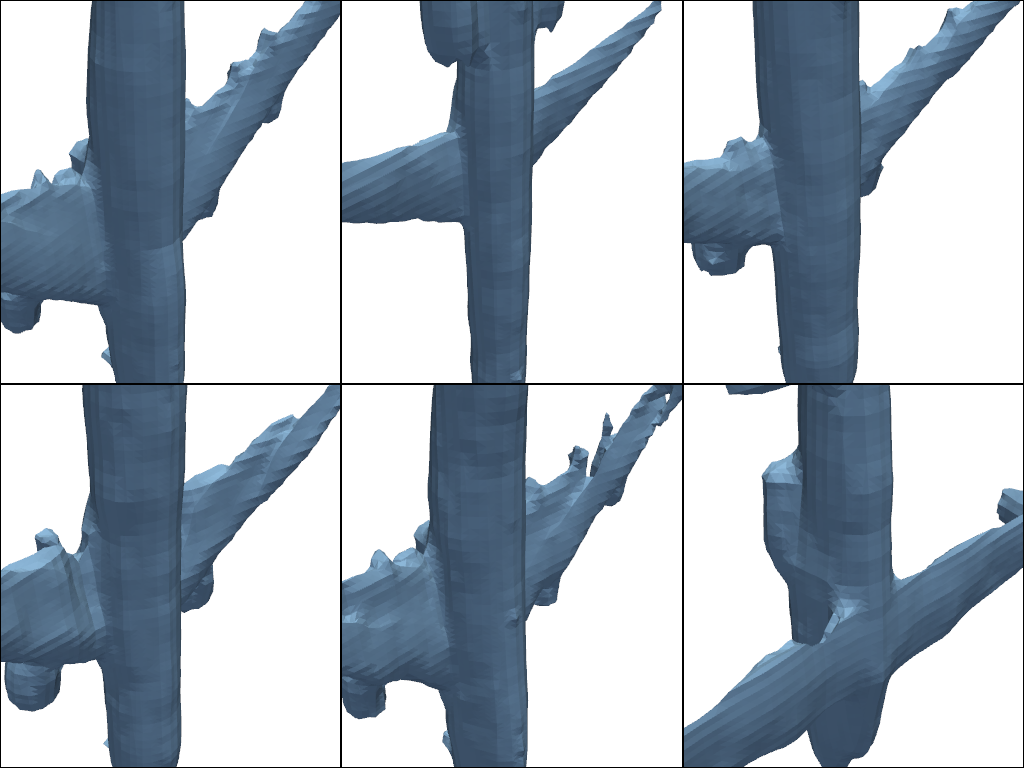

In [27]:
import pyvista as pv
import os


# Initialize a 2x3 grid plotter (for 6 meshes)
plotter = pv.Plotter(shape=(2, 3))

# Define a lighter blue color
light_blue = [0.6, 0.8, 1.0]  # RGB values for a lighter blue

# Camera position for diagonal view
camera_position = [(1, 1, 1), (0, 0, 0), (0, 0, 1)]  # [position, focus, view up]

# Loop through each file and add each mesh to a subplot
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith('.obj'):
        # Read the mesh
        mesh = pv.read(os.path.join(folder_path, filename))
        
        # Select the subplot location in a 2x3 grid
        plotter.subplot(i // 3, i % 3)
        
        # Add the mesh with a lighter blue color
        plotter.add_mesh(mesh, color=light_blue)
        
        # Set the camera position for a diagonal view
        plotter.camera_position = camera_position

# Display the plot with all meshes in a 2x3 grid and a diagonal view
plotter.show()


In [ ]:
import pyvista as pv
import os
mesh = pv.read('other_airplanes/model_normalized 12.obj')
# mesh.plot()

plotter = pv.Plotter(notebook=False)

# Define a lighter blue color
light_blue = [0.6, 0.8, 1.0]  # RGB values for a lighter blue

# Camera position for diagonal view
camera_position = [(0, -0.5, -0.5), (0, 0, 0), (0, 0, 0)]  # [position, focus, view up]
# mesh = pv.read('paper_img/model_normalized.obj')
# actor = plotter.add_mesh(mesh, color=light_blue)
actor = plotter.add_mesh(mesh, cmap="blue", split_sharp_edges=True, clim=[2, 5], metallic=0.5,  roughness=0.5)
# actor = plotter.add_mesh(mesh, color="lightblue", split_sharp_edges=True, pbr=True, metallic=1.0, roughness=0.3)
plotter.camera_position = camera_position
actor.orientation = (90, 75, 135)
light = pv.Light([0, -1, -1], color='blue', light_type='headlight')
plotter.add_light(light)
plotter.show()

/Users/q603750/envs/pyoccenv/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


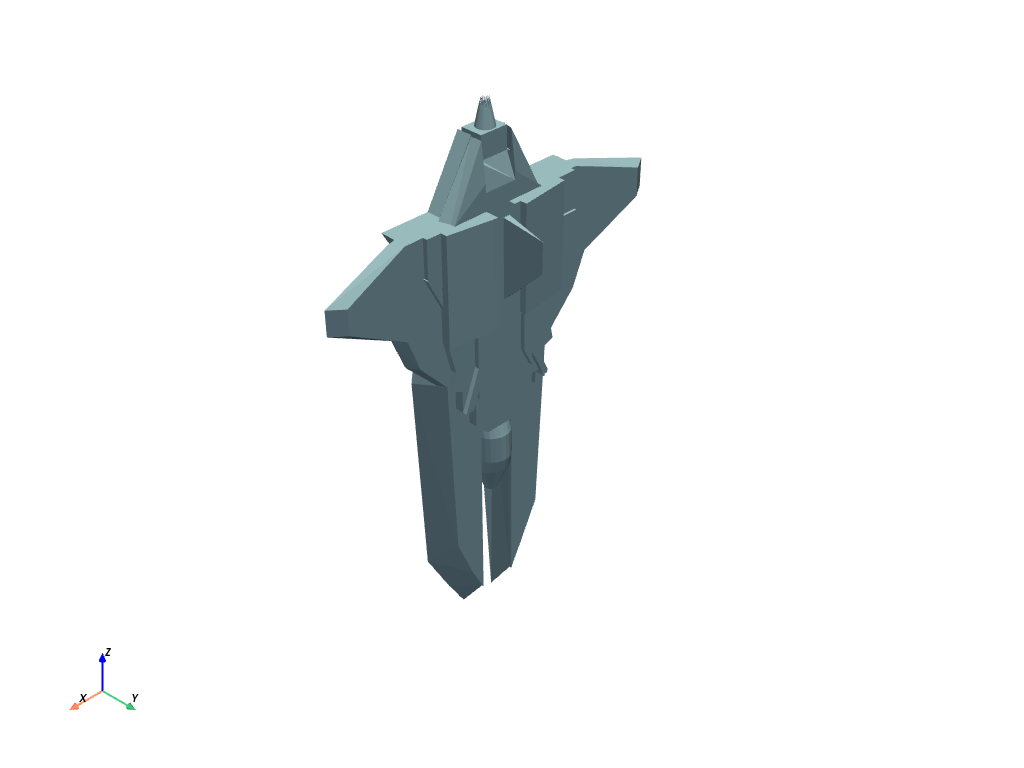

In [47]:
mesh.plot(smooth_shading=True)


/Users/q658028/Library/Python/3.12/lib/python/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


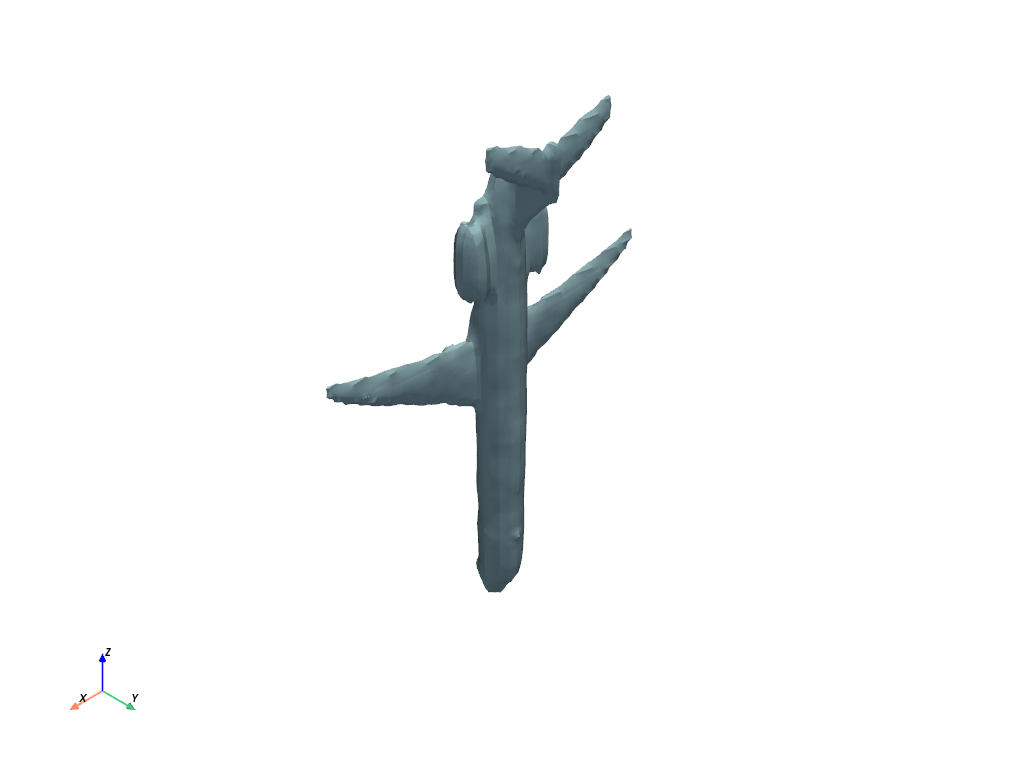

In [30]:
mesh.plot(smooth_shading=True, split_sharp_edges=True)


In [140]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np

import pyvista as pv
from pyvista import examples

In [33]:
sdf= np.load('/Users/q658028/Downloads/root/DiffusionModelTraining/data/rims_stl/train_sdfs/23369787_is45_w190,50_scaled_trimmed.npy')

In [4]:
!conda install scikit-image


ProxyError: Conda cannot proceed due to an error in your proxy configuration.
Check for typos and other configuration errors in any '.netrc' file in your home directory,
any environment variables ending in '_PROXY', and any other system-wide proxy
configuration settings.




In [71]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

npy_file_path = 'sdf_airplanes/1a6ad7a24bb89733f412783097373bdc.npy'
data = np.load(npy_file_path)
 
if data.ndim != 3:
    raise ValueError("The input .npy file must be a 3D array.")
 
shape = data.shape
 
grid = pv.StructuredGrid()
 
grid.dimensions = shape
 
grid.spacing = (1.0, 1.0, 1.0)  
 
x = np.arange(0, shape[0])
y = np.arange(0, shape[1])
z = np.arange(0, shape[2])
 
x, y, z = np.meshgrid(x, y, z)
 
points = np.vstack((x.flatten(), y.flatten(), z.flatten())).T
 
grid.points = points
 
grid.point_data['values'] = data.flatten()
 
slices = grid.slice_orthogonal()
cmap = plt.get_cmap("viridis", 100)
 
# Rotate the view by 90 degrees around the x-y plane
plotter = pv.Plotter(notebook=False,window_size=[1024, 1024])
actor = plotter.add_mesh(slices, cmap=cmap, clim=[0, 0.1], opacity=0.6)
# plotter.(False)
# plotter.view_vector([0.4, 0.2, 0.1])
plotter.view_vector([1, -0.3, 0.6])
# actor.orientation = (0, 75, 135)
plotter.show(interactive=True) 
 


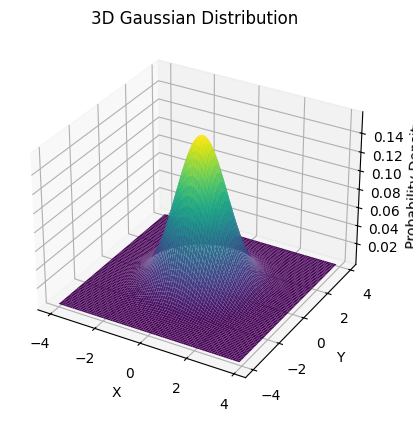

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Set up the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define the Gaussian distribution parameters
mean = [0, 0]
cov = [[1, 0], [0, 1]]

# Generate the 3D grid of x, y, and z values
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)

# Calculate the Gaussian distribution values
Z = (1 / (2 * np.pi * np.sqrt(np.linalg.det(cov)))) * np.exp(-0.5 * (((X - mean[0]) ** 2 + (Y - mean[1]) ** 2) / np.linalg.det(cov)))

# Plot the 3D Gaussian distribution
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

# Set the axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Probability Density')
ax.set_title('3D Gaussian Distribution')

ax.grid(False)
# Show the plot
plt.show()